In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import os

from numpy.random import seed
seed(101)

from tensorflow import set_random_seed
set_random_seed(101)



In [2]:
meta = pd.read_csv("HAM10000_metadata.csv")
meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


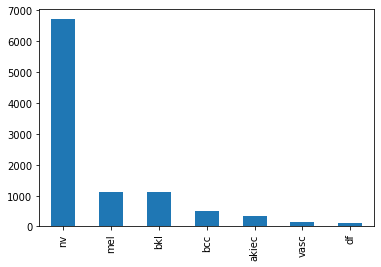

In [3]:
meta.dx.value_counts().plot.bar(rot=90)

In [4]:
meta.dx.value_counts()[:4]

nv     6705
mel    1113
bkl    1099
bcc     514
Name: dx, dtype: int64

In [5]:
classes = list(meta.dx.value_counts().keys())[0:4]
meta = meta[meta.dx.isin(classes)]
print (classes)

['nv', 'mel', 'bkl', 'bcc']


In [6]:
clss={}
for num,name in enumerate(classes):
    clss[name]=num

print (clss)

def label_encode(label):
    return clss[label]

meta["class"] = meta.dx.apply(label_encode)
meta.sample(5)

{'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3}


,lesion_id,image_id,dx,dx_type,age,sex,localization,class
8045,HAM_0002607,ISIC_0032744,nv,consensus,25.0,male,unknown,0
4094,HAM_0004608,ISIC_0028979,nv,follow_up,40.0,male,lower extremity,0
9437,HAM_0002425,ISIC_0032682,nv,consensus,20.0,male,back,0
3082,HAM_0006693,ISIC_0024462,nv,follow_up,45.0,male,lower extremity,0
5685,HAM_0001472,ISIC_0024334,nv,follow_up,45.0,female,trunk,0


In [7]:
from glob import glob
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('images/', '*.jpg'))}
meta['path'] = meta['image_id'].map(imageid_path_dict.get)
meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,class,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,images\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,images\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,images\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,images\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,images\ISIC_0031633.jpg


In [8]:
#data segregation
'''meta_bcc = meta.loc[meta['dx']=='bcc']
meta_nv = meta.loc[meta['dx']=='nv']
meta_bkl = meta.loc[meta['dx']=='bkl']
meta_mel = meta.loc[meta['dx']=='mel']

print (len(meta_bcc),len(meta_nv),len(meta_bkl),len(meta_mel))
    '''

"meta_bcc = meta.loc[meta['dx']=='bcc']\nmeta_nv = meta.loc[meta['dx']=='nv']\nmeta_bkl = meta.loc[meta['dx']=='bkl']\nmeta_mel = meta.loc[meta['dx']=='mel']\n\nprint (len(meta_bcc),len(meta_nv),len(meta_bkl),len(meta_mel))\n    "

In [9]:
'''from PIL import Image
import pickle'''

'from PIL import Image\nimport pickle'

In [10]:
'''temp = []
for path in meta_bcc['path']:
    img = Image.open(path)
    img = img.resize([64,64])
    temp.append(np.asarray(img))'''

"temp = []\nfor path in meta_bcc['path']:\n    img = Image.open(path)\n    img = img.resize([64,64])\n    temp.append(np.asarray(img))"

In [11]:
'''temp = np.array(temp)
print (temp.shape)
with open('bcc.pickle','wb') as f:
    pickle.dump(temp,f)'''

"temp = np.array(temp)\nprint (temp.shape)\nwith open('bcc.pickle','wb') as f:\n    pickle.dump(temp,f)"

In [12]:
'''from PIL import Image
#with h5py.File("../working/images.hdf5", "w") as f:
#imgs = {}
labels=[]
Y=[]
trainX=[]
for c in classes:
    temp = meta[meta["dx"]==c]
    for path in temp["path"]:
        image=Image.open(path)
        image=image.resize([64,64])
        trainX.append(np.asarray(image))
        labels.append(np.eye(len(classes))[clss[c]])
        Y.append(clss[c])
    #img_arr = np.array(img_arr)
    #imgs[c] = img_arr
    #dset = f.create_dataset(c,data=img_arr)
    #del img_arr'''

'from PIL import Image\n#with h5py.File("../working/images.hdf5", "w") as f:\n#imgs = {}\nlabels=[]\nY=[]\ntrainX=[]\nfor c in classes:\n    temp = meta[meta["dx"]==c]\n    for path in temp["path"]:\n        image=Image.open(path)\n        image=image.resize([64,64])\n        trainX.append(np.asarray(image))\n        labels.append(np.eye(len(classes))[clss[c]])\n        Y.append(clss[c])\n    #img_arr = np.array(img_arr)\n    #imgs[c] = img_arr\n    #dset = f.create_dataset(c,data=img_arr)\n    #del img_arr'

In [16]:
trainX = np.array(trainX)
labels = np.array(labels)
Y = np.array(Y)
print (trainX.shape,labels.shape)

NameError: name 'trainX' is not defined

In [14]:
import pickle
with open('train_data.pickle','wb') as f:
    pickle.dump(trainX,f)
with open('train_data_labels.pickle','wb') as f:
    pickle.dump(Y,f)

NameError: name 'trainX' is not defined

In [ ]:
with open('train_labels_one_hot.pickle','wb') as f:
    pickle.dump(labels,f)

In [ ]:
import pickle
with open('train_data.pickle','rb') as f:
    trainX = pickle.load(f)
with open('train_labels_one_hot.pickle','rb') as f:
    labels = pickle.load(f)
with open('train_data_labels.pickle','rb') as f:
    Y = pickle.load(f)
    
print (trainX.shape,labels.shape,Y.shape)

In [ ]:
with open('')

In [15]:
from sklearn.utils import shuffle
trainX,labels,Y=shuffle(trainX,labels,Y,random_state=101)

NameError: name 'trainX' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
trainX,testX,trainLabels,testLabels,trainY,testY=train_test_split(
    trainX,labels,Y,test_size=0.15,random_state=101,stratify=Y)
trainX,valX,trainLabels,valLabels,trainY,valY=train_test_split(
    trainX,trainLabels,trainY,test_size=0.15,random_state=101,stratify=trainY)

In [ ]:
print (trainX.shape,trainLabels.shape)
print (valX.shape,valLabels.shape)
print (testX.shape,testLabels.shape)

print (trainX.shape[0]+valX.shape[0]+testX.shape[0])

In [ ]:
with open('train_x.pickle','wb') as f:
    pickle.dump(trainX,f)
with open('train_y.pickle','wb') as f:
    pickle.dump(trainLabels,f)
with open('validation_x.pickle','wb') as f:
    pickle.dump(valX,f)
with open('validation_y.pickle','wb') as f:
    pickle.dump(valLabels,f)
with open('test_x.pickle','wb') as f:
    pickle.dump(testX,f)
with open('test_y.pickle','wb') as f:
    pickle.dump(testLabels,f)

In [ ]:
from keras.layers import Input,Conv2D,BatchNormalization,Dense,Dropout,Flatten,MaxPooling2D,Reshape,Conv2DTranspose,Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu,sigmoid
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential,Model
from keras.optimizers import SGD,Adam

def make_model(shape):
    model=Sequential()
    model.add(Conv2D(16,(5,5),input_shape=shape,activation=relu,padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(3,3),activation=relu,padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3),activation=relu,padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation=relu,padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(160,activation=sigmoid))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(80,activation=sigmoid))
    model.add(BatchNormalization())
    model.add(Dense(len(classes),activation="softmax"))
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3])
model=make_model(shape)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

filepath="model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
callbacks_list = [checkpoint,reduce_lr]
history = model.fit(trainX,trainLabels,validation_data=(valX,valLabels),epochs=50,callbacks=callbacks_list,verbose=2)

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score
model = load_model('model_weights.h5')
test_pred=np.argmax(model.predict(testX),axis=1)
acc=accuracy_score(testY,test_pred)
print(acc)

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
plot_model_history(history)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testLabels,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4))

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_true, Y_pred_classes)

print(report)